In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt



In [24]:
#load datasetù
fashion_mnist= keras.datasets.fashion_mnist
#split into testing and trainig
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [25]:
train_images.shape


(60000, 28, 28)

In [26]:
#let's take a look of one pixel
train_images[0,23,23]

194

In [27]:
#let's have a look at the first trainig lables
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [28]:
class_names=['T-shirt/top','Trouser','Pullover',
            'Dress','Coat','Sandal','Shirt','Sneaker',
             'Bag','Ankle boot'
            ]

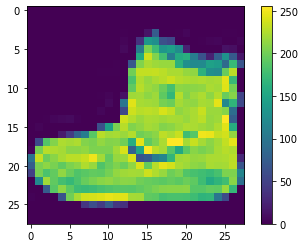

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Pre-processing

In [30]:
#squeshe all my values between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

# Building the model

In [31]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='softmax')#output layer
    
])

# Compile the model

In [33]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
             )

# Training the model

In [40]:

model.fit(train_images,train_labels,epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1596 - accuracy: 0.9397


# Evaluating the model

In [41]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('test accuracy:',test_acc)

313/313 [==============================] - 0s 931us/step - loss: 0.3724 - accuracy: 0.8889
test accuracy: 0.8888999819755554


# Predictions

In [43]:
predictions=model.predict(test_images)

313/313 [==============================] - 0s 792us/step


Sneaker


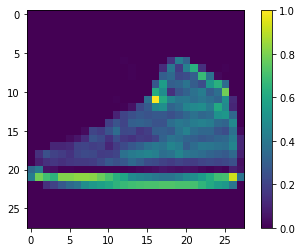

In [50]:
print(class_names[np.argmax(predictions[45])])
plt.figure()
plt.imshow(test_images[45])
plt.colorbar()
plt.grid(False)
plt.show()